<a href="https://colab.research.google.com/github/DanielaRandazo/coderhouse/blob/main/Desafio_AlgoritmoML_MVP_RandazoDaniela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importo Librerias

In [3]:
from google.colab import drive
drive.mount('/CoderHouse')

Mounted at /CoderHouse


In [4]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
DF_IMDB = pd.read_csv('/CoderHouse/MyDrive/CoderHouse/IMDB.csv')

In [5]:
print(DF_IMDB.columns)

Index(['Unnamed: 0', 'index', 'tconst', 'titleType', 'primaryTitle',
       'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes', 'ordering', 'title', 'region',
       'language', 'types', 'attributes', 'isOriginalTitle', 'Description'],
      dtype='object')



# ***Analisis y evolucion de la industria cinematografica a nivel mundial en las ultimas decadas***
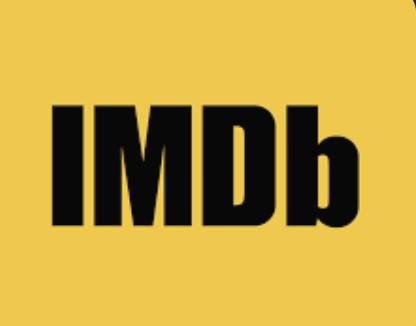


# Analisis de valores nulos:

In [6]:
DF_IMDB.dtypes

Unnamed: 0           int64
index                int64
tconst              object
titleType           object
primaryTitle        object
originalTitle       object
isAdult              int64
startYear            int64
endYear             object
runtimeMinutes      object
genres              object
averageRating      float64
numVotes             int64
ordering             int64
title               object
region              object
language            object
types               object
attributes          object
isOriginalTitle      int64
Description         object
dtype: object

In [7]:
DF_IMDB.isna().sum()

Unnamed: 0           0
index                0
tconst               0
titleType            0
primaryTitle         0
originalTitle        0
isAdult              0
startYear            0
endYear              0
runtimeMinutes       0
genres               0
averageRating        0
numVotes             0
ordering             0
title                0
region               0
language             0
types                0
attributes           0
isOriginalTitle      0
Description        188
dtype: int64



---



# Seleccion de caracteristicas:

Para validar nuestra hipótesis de que el género "Drama" ha evolucionado de manera más significativa que el género "Acción" a lo largo del tiempo en la industria cinematográfica, es esencial que nos centremos en las características que son relevantes para esta comparación. En este caso, las características pertinentes son los géneros cinematográficos a lo largo de los años.
Dado que mi objetivo es comparar la evolución de dos géneros específicos, el "Drama" y la "Acción," no es necesario realizar una selección de características en el sentido tradicional. En lugar de eso, debo asegurarte de que tu conjunto de datos esté correctamente estructurado para permitir esta comparación. Esto implica organizar mis datos de manera que pueda analizar directamente la evolución de la cantidad de películas de "Drama" y "Acción" a lo largo del tiempo.
Para esto debo:
* Preparar los Datos: Asegurarme que mi conjunto de datos contenga las columnas "Año" y "Género" y que estén formateadas de manera adecuada.
* Análisis Descriptivo: Con un análisis descriptivo que muestre cómo ha evolucionado la cantidad de películas de "Drama" y "Acción" a lo largo de los años.
* Pruebas Estadísticas: Necesito hacer pruebas estadísticas adecuadas para determinar si hay una diferencia significativa en la evolución de estos dos géneros. Voy a considerar pruebas de hipótesis, para comparar las tendencias a lo largo del tiempo.

Como estoy trabajando con una característica (genero) no seria necesario realizar una seleccion de características tradicional en este contexto pero voy a considerar una aproximación que implique la selección de características más relevantes para la comparación entre los géneros "Drama" y "Acción"
* Codificación de Variables Categóricas: Como mis datos están en formato categórico, "Drama" y "Acción", primero voy a codificar estas categorías en valores numéricos. Usando la codificación one-hot (binaria) para representar cada género como una variable binaria (1 para "Drama" y 0 para "Acción”.
* Selección de Características: Después de la codificación,  aplico técnicas de selección de características. Para mi caso, considero el uso de técnicas como la Prueba F (ANOVA) o el Chi-cuadrado para evaluar la importancia de cada género (característica) en relación con la variable objetivo (evolución a lo largo del tiempo).
* Establecimiento de un Umbral: Defino un umbral para seleccionar las características más relevantes. Utilizo estadísticas de prueba o puntuaciones de importancia para establecer este umbral.
* Análisis Comparativo: Una vez que reduje mis características a las más relevantes, realizo un análisis comparativo entre los géneros "Drama" y "Acción" en función de la evolución a lo largo del tiempo.

# **Modelo**

Empiezo a entrenar mi modelo

In [8]:
#Creo mi nuevo DF con las columnas que necesito para mi modelo
# 'index', 'titleType', 'startYear', 'genres', 'averageRating', 'region'

DF_IMDB_M = DF_IMDB[['index', 'startYear', 'averageRating']]

# Define una función que asigna 0 a 'Drama' y 1 a 'Acción'

def asignar_valor(genres):
    if 'Drama' in genres:
        return 0
    elif 'Action' in genres:
        return 1
    else:
        return -1  # Otra categoría

# Aplica la función y crea una nueva columna 'genero_codificado'
DF_IMDB_M['genres_cod'] = DF_IMDB['genres'].apply(asignar_valor)

print(DF_IMDB_M.head(20))



    index  startYear  averageRating  genres_cod
0       0       1991            8.6           0
1       1       1991            8.6           1
2       3       1994            8.5           0
3       4       1994            8.9           0
4       5       1994            9.3           0
5       8       1997            7.9           0
6       9       2005            7.3           0
7      14       2000            8.5           0
8      15       2001            7.2           0
9      16       1998            8.0          -1
10     17       2000            6.6           1
11     20       2001            7.5           0
12     21       2002            6.6           0
13     23       2002            8.5           0
14     24       2000            8.4          -1
15     34       2000            7.7          -1
16     37       2001            8.6          -1
17     42       2004            8.0           1
18     45       2009            7.7           0
19     47       2003            7.2     

<ipython-input-8-a784840d2184>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_IMDB_M['genres_cod'] = DF_IMDB['genres'].apply(asignar_valor)


# Ya tengo mis datos acomodados para poder empezar a entrenar mi modelo de Machine Learning


Divido mis datos en un conjunto de entrenamiento y un conjunto de prueba.
El conjunto de entrenamiento se utiliza para entrenar el modelo, mientras que el conjunto de prueba se utiliza para evaluar su rendimiento.

In [9]:
from sklearn.model_selection import train_test_split

X = DF_IMDB_M.drop(columns=['genres_cod'])  # Elimina la variable objetivo
y = DF_IMDB_M['genres_cod']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Entreno el modelo

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Evaluo el modelo

In [11]:
y_pred = model.predict(X_test)

# Calculo las métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred, zero_division=0)

print(f'Precisión: {accuracy}')
print(report)


Precisión: 0.6598726114649681
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       340
           0       0.66      1.00      0.80      1036
           1       0.00      0.00      0.00       194

    accuracy                           0.66      1570
   macro avg       0.22      0.33      0.27      1570
weighted avg       0.44      0.66      0.52      1570



Intentaremos graficar nuestro modelo

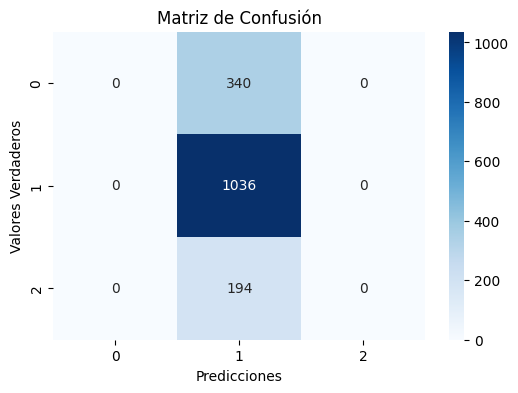

Precisión: 0.6598726114649681
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       340
           0       0.66      1.00      0.80      1036
           1       0.00      0.00      0.00       194

    accuracy                           0.66      1570
   macro avg       0.22      0.33      0.27      1570
weighted avg       0.44      0.66      0.52      1570



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Calculo la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Creo un gráfico de matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.title("Matriz de Confusión")

# Muestro el gráfico
plt.show()

# Muestro la precisión y otros informes
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

print(f'Precisión: {accuracy}')
print(report)




---



# *Vamos a intentar predecir la cantidad de peliculas de Drama que seran lanzadas en el proximo anio, para lo que usaremos un modelo de regresion*


* 		Preparación de datos:
    * Tengo un conjunto de datos históricos que incluye la cantidad de películas lanzadas en cada año. Esto podría incluir géneros, presupuesto, directores, actores, etc.
* 		Ingeniería de características:
    * Puedo crear características adicionales a partir de los datos existentes, como la tendencia histórica en el número de películas lanzadas o características relacionadas con los géneros de las películas.
* 		División de datos:
    * Divido mis datos en un conjunto de entrenamiento y un conjunto de prueba. Dado que estoy interesada en predecir el próximo año, puedo utilizar los datos históricos hasta un cierto año como conjunto de entrenamiento y los datos del año siguiente como conjunto de prueba.
* 		Selección de modelo de regresión:
    * Elijo el modelo de regresión temporal.
* 		Entrenamiento del modelo:
    * Entreno el modelo utilizando los datos de entrenamiento y las características seleccionadas.
* 		Predicción del próximo año:
    * Utilizo el modelo entrenado para hacer predicciones sobre la cantidad de películas que se lanzarán en el próximo año. Me aseguro de que las características de entrada para la predicción estén disponibles para ese año.
* 		Evaluación del modelo:
    * Evaluo el rendimiento del modelo utilizando métricas de regresión, como el error cuadrático medio (MSE) o el coeficiente de determinación (R^2), en los datos de prueba.
* 		Ajuste del modelo:
    * Si es necesario, ajusto el modelo y las características para mejorar la precisión de las predicciones.
* 		Predicción futura:
    * Una vez que tengo un modelo entrenado y evaluado, puedo usarlo para realizar predicciones de la cantidad de películas para años futuros.


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# Filtra las películas de género "Drama"
drama_movies = DF_IMDB[DF_IMDB['genres'] == 'Drama']

# Agrupa las películas por año y cuenta la cantidad de películas lanzadas en cada año
yearly_drama_counts = drama_movies.groupby('startYear').size().reset_index(name='Movie_Count')

# Establece el año para el cual deseas hacer la predicción (por ejemplo, el próximo año)
next_year = datetime.now().year + 1

# Prepara los datos de entrenamiento y prueba
X = yearly_drama_counts[['startYear']]
y = yearly_drama_counts['Movie_Count']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el modelo de regresión
model = LinearRegression()

# Crea un pipeline que incluye la transformación y el modelo
regression_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', model)])

# Ajusta el modelo a los datos de entrenamiento
regression_pipeline.fit(X_train, y_train)

# Realiza la predicción para el próximo año
next_year_prediction = regression_pipeline.predict([[next_year]])


print(f'Predicción para el próximo año ({next_year}): {int(next_year_prediction[0])} películas de género "Drama"')



Predicción para el próximo año (2025): 37 películas de género "Drama"


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## *Validacion Cruzada de mi modelo*

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold  # Para clasificación

# Ya tengo mis datos X y y preparados

# Creo un modelo (regresión logística)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Especifico el número de "folds" para la validación cruzada
k = 5  # Por ejemplo, 5-fold cross-validation

# Creo un objeto StratifiedKFold para la validación cruzada estratificada
cv = StratifiedKFold(n_splits=k)

# Realizo la validación cruzada para una lista de puntuaciones
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Imprimo las puntuaciones de cada fold
for fold, score in enumerate(scores, start=1):
    print(f'Fold {fold} - Puntuación de precisión: {score}')

# Calculo y muestro la puntuación media de la validación cruzada
mean_score = scores.mean()
print(f'Puntuación media: {mean_score}')


Fold 1 - Puntuación de precisión: 0.14285714285714285
Fold 2 - Puntuación de precisión: 0.14285714285714285
Fold 3 - Puntuación de precisión: 0.14285714285714285
Fold 4 - Puntuación de precisión: 0.16666666666666666
Fold 5 - Puntuación de precisión: 0.16666666666666666
Puntuación media: 0.15238095238095237


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
